## 线性判别分析(多类情形)

前文详细阐述了只有二类的情形，假设如果是多类情形，该怎么处理才能保证投影后的类别能够较好的分离呢？

我们之前讨论的是如何将$n$(特征个数)维降到一维，现在类别多了，一维也许已经不能做到投影后达到较好的分离效果。假设我们有$n_{labels}$个类别，需要$k$维向量(基向量)来做投影。将这$k$维向量表示为

$$W = (w_1, w_2, …, w_k), \,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\, w_i (i=1, 2, …, k) 是列向量, $$

则有

$$y_i = w^T_i x, \,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,  y = W^T x,  $$

将$D$按照类别标签划分为$D_{n_{labels}}$类$D_1, D_2, …, D_{n_{labels}}$, 其中$D_1\bigcup D_2\bigcup …\bigcup D_{n_{labels}}=D, D_1\bigcap D_2\bigcap …\bigcap D_{n_{labels}} =\emptyset$, 
定义每个子集的中心：

若是多类别，相关符号与二类别类似(详见上篇文章)，其中子集$D_i$的均值(中心)为

$$\mu_i = \frac{1}{n_i} \sum_{x^{(i)} \in D_i} {x^{(i)}}, \,\,\,\,\,\,\,\,\,\,\,\, \,\,\,\,\,\, \,\,\,\,\,\, \,\,\,\,\,\, \,\,\,\,\,\, \,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\, \,\,\,\,\,\, \,\,\,\,\,\, \,\,\,\,\,\, \,\,\,\,\,\, \,\,\,\,\,\,  (1) $$

总体样本均值：
$$\mu = \frac{1}{m} \sum_{x^{(i)} \in D} {x^{(i)}},\,\,\,\,\,\,\,\,\,\,\,\, \,\,\,\,\,\, \,\,\,\,\,\, \,\,\,\,\,\, \,\,\,\,\,\, \,\,\,\,\,\, \,\,\,\,\,\,\,\,\,\,\,\, \,\,\,\,\,\, \,\,\,\,\,\, \,\,\,\,\,\, \,\,\,\,\,\, \,\,\,\,\,\,\,\,\,\,\, (2)$$

类内离散度矩阵定义类似：

$$ S_w = \sum_{i=1}^{n_{labels}} \sum_{x^{(k)}  { \in D_i}} ({x^{(k)}- \mu_i})  ({x^{(k)}- \mu_i})^T, \,\,\,\,\,\,\,\,\,\,\,\, \,\,\,\,\,\, \,\,\,\,\,\, \,\,\,\,\,\, \,\,\,\,\,\, \,\,\,\,\,\,\,\, (3)$$

需要注意的是，类间离散度矩阵的定义有些不同，回想我们二值类型情形时的公式$J(w)$，分子是两类中心距，分母是每个类自己的散列度。现在投影方向是多维了(多条直线)，分子需要做一些改变，我们不是求两两样本中心距之和(这个对描述类别间的分散程度没有用)，而是求每类中心相对于全样本中心的散列度之和。原来度量的是两个均值点的散列情况，现在度量的是每类均值点相对于样本中心的散列情况。类似于将$\mu_i$看作样本点，$\mu$看作均值的协方差矩阵，如果某类里面的样本点较多，那么其权重稍大，权重用$\frac{n_i}{m}$表示，但由于$J(w)$对倍数不敏感，因此使用$n_i$，$S_B$的具体定义如下：

$$ S_B = \sum_{i=1}^{n_{labels}}  n_i (\mu_i - \mu) (\mu_i - \mu)^T ,\,\,\,\,\,\,\,\,\,\,\,\, \,\,\,\,\,\, \,\,\,\,\,\, \,\,\,\,\,\, \,\,\,\,\,\, \,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\, (4) $$

当然还有另一种类间类内的离散度矩阵表达方式：

$$ S_B = \sum_{i=1}^{n_{labels}} p(i) (\mu_i - \mu) (\mu_i - \mu)^T ,$$

$$ S_w = \sum_{i=1}^{n_{labels}} \frac{p(i)}{n_i} \sum_{x^{(k)}  { \in D_k}} ({x^{(k)}- \mu_i})  ({x^{(k)}- \mu_i})^T = \sum_{i=1}^{n_{labels}} p(i) E\{ { ({x^{(k)}- \mu_i})  ({x^{(k)}- \mu_i})^T} | {x^{(k)}  { \in D_k}} \}  . $$

其中$p(i)$是第$i$类样本的先验概率，即样本中属于$i$类的概率 ($p(i) = \frac{n_i}{m}$) ，把$p(i) = \frac{n_i}{m}$ 代入上面第二组式子中我们可以发现第一组式子只是比第二组式子都少乘了$\frac{1}{m}$，我们将在稍后进行讨论，其实对于乘不乘该$\frac{1}{m}$，对于算法本身并没有影响，现在我们分析一下算法的思想.

我们可以知道矩阵$ (\mu_i - \mu) (\mu_i - \mu)^T$的实际意义是一个协方差矩阵，这个矩阵所刻画的是该类与样本总体之间的关系，其中该矩阵对角线上的函数所代表的是该类相对样本总体的方差(即分散度)，而非对角线上的元素所代表是该类样本总体均值的协方差（即该类和总体样本的相关联度或称冗余度），所以根据公式(4)可知，(4)式即把所有样本中各个样本根据自己所属的类计算出样本与总体的协方差矩阵的总和，这从宏观上描述了所有类和总体之间的离散冗余程度。同理可以的得出(3)式中为分类内各个样本和所属类之间的协方差矩阵之和，它所刻画的是从总体来看类内各个样本与类之间(这里所刻画的类特性是由是类内各个样本的平均值矩阵构成)离散度，其实从中可以看出不管是类内的样本期望矩阵还是总体样本期望矩阵，它们都只是充当一个媒介作用，不管是类内还是类间离散度矩阵都是从宏观上刻画出类与类之间的样本的离散度和类内样本和样本之间的离散度。

LDA做为一个分类的算法，我们当然希望它所分的类之间耦合度低，类内的聚合度高，即类内离散度矩阵的中的数值要小，而类间离散度矩阵中的数值要大，这样的分类的效果才好。

与上一篇文章类似，我们引入Fisher判别准则表达式，即损失函数：

$$ J(w) = \frac{|W^T S_B W|}{|W^T S_w W|}\,\,\,\,\,\,\,\,\,\,\,\, \,\,\,\,\,\, \,\,\,\,\,\, \,\,\,\,\,\, \,\,\,\,\,\,\,\,\,\,\, \,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\, (5) $$

由于我们得到的分子分母都是散列矩阵，要将矩阵变成实数，需要取行列式。又因为行列式的值实际上是矩阵特征值的积，一个特征值可以表示在该特征向量上的发散程度。因此我们使用行列式来计算（此处我感觉有点牵强，道理不是那么有说服力）。整个问题又回归为求$J(w)$的最大值了。

我们的目标就是通过最优化(5)式，找到有一组最优鉴别矢量构成的投影矩阵(这里我们也可以看出1/m可以通过分子分母约掉，所以前面所提到的第一组公式和第二组公式所表达的效果是一样的)。

$$ W^* = argmax \frac{|W^T S_B W|}{|W^T S_w W|}\,\,\,\,\,\,\,\,\,\,\,\, \,\,\,\,\,\, \,\,\,\,\,\, \,\,\,\,\,\, \,\,\,\,\,\, \,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\, (6) $$

可以证明，当为$ S_w $非奇异时(一般在实现LDA算法时，都会对样本做一次PCA算法的降维，消除样本的冗余度，从而保证$ S_w $是非奇异阵，当然即使$ S_w $为奇异阵也是可以解的，可以把$ S_w $或$ S_B $对角化，这里不做讨论，假设都是非奇异的情况)时，根据拉格朗日乘数法容易知道(详细推导见上一篇文章)，最佳投影矩阵$ W^* $的列向量满足下面特征方程

$$ S_B W = \lambda S_w W ,\,\,\,\,\,\,\,\,\, \,\,\,\,\,\, \,\,\,\,\,\, \,\,\,\,\,\, \,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,
\,\,\,\,\,\,\,\,\,\,\,\, (7) $$ 

将(7)式代入(6)式可得，
$$ W^* = argmax \, |\lambda|\,\,\,\,\,\,\,\,\,\,\,\, \,\,\,\,\,\, \,\,\,\,\,\, \,\,\,\,\,\, \,\,\,\,\,\, \,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,  $$

很明显，只需要取绝对值比较大的$k$个特征值(矩阵$S_w^{-1}S_B$的特征值)所对应的特征向量，而这$k$个向量构成的低维空间就是我们需要找的低维空间。

注意：由于$S_B$中的$\mu_i-\mu$秩为1，因此$S_B$的秩至多为$n_{labels}$。又因为$\sum_{i=1}^{n_{labels}}(\mu_i-\mu)=0$, 因此$S_B$的秩至多为$n_{labels}-1$，因此，$k<=n_{labels}-1$。

由于$S^{-1}_wS_B$不一定是对称阵，因此，得到的$k$个特征向量不一定正交，这也是与PCA不同的地方。

### 算法流程


输入：数据集$D=\{x^{(1)}, x^{(1)}, …, x^{(m)}\}$；

输出：降维后的样本集$D′$；

* 计算类内散度矩阵$S_w$和类间散度矩阵$S_B$；

* 计算矩阵$S^{-1}_wS_B$的特征值；

* 找出矩阵$S^{-1}_wS_B$最大的$k$个特征值和其对应的$k$个特征向量$(w_1,w_2,...,w_k)$；

* 将原始样本集投影到以$(w_1,w_2,...,w_k)$为基向量生成的低维空间中(k维)，投影后的样本集就是我们需要的样本集$D′$。







### LDA算法总结

LDA算法既可以用来降维，又可以用来分类，但是目前来说，主要还是用于降维。在我们进行图像识别图像识别相关的数据分析时，LDA是一个有力的工具。下面总结下LDA算法的优缺点。

LDA算法的主要优点有：

* LDA是监督学习，在分类和降维过程中利用了类别的先验知识，而像PCA这样的无监督学习则无法使用类别先验知识。

* LDA在样本分类信息依赖均值而不是方差的时候，比PCA之类的降维算法效果更好。


缺点

* LDA至多投影到$n_{labels}-1$维子空间；

* LDA不适合对非高斯分布样本进行降维；




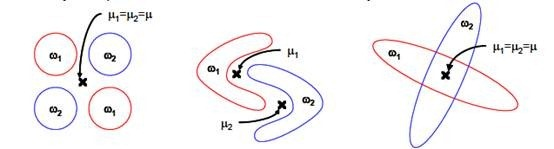

In [8]:
from IPython.display import Image, display

display(Image('lda1.jpg'))

上图中红色区域表示一类样本，蓝色区域表示另一类，由于是2类，所以最多投影到1维上。不管在直线上怎么投影，都难使红色点和蓝色点内部凝聚，类间分离。


* LDA在样本分类信息依赖方差而不是均值时，效果不好；


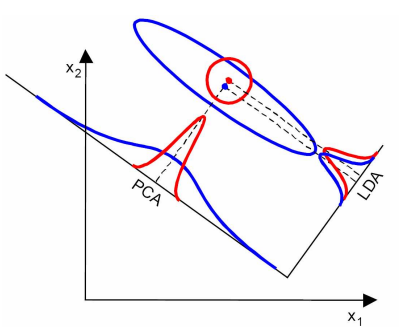

In [9]:
display(Image('lda2.png'))

上图中，样本点依靠方差信息进行分类，而不是均值信息。LDA不能够进行有效分类，因为LDA过度依靠均值信息。

* LDA可能过度拟合数据；

* LDA在非线性情形效果不好。

### LDA的一些变种


1、 非参数LDA

   非参数LDA使用本地信息和$k$临近样本点来计算$S_B$,使得$S_B$是全秩的，这样我们可以抽取多余$n_{labels}-1$个特征向量。而且投影后分离效果更好。

2、 正交LDA

   先找到最佳的特征向量，然后找与这个特征向量正交且最大化$fisher$条件的向量。这种方法也能摆脱$n_{labels}-1$的限制。

3、 一般化LDA

   引入了贝叶斯风险等理论

4、 核函数LDA

   将特征做变换$ x \to \phi(x)$，使用核函数来计算。

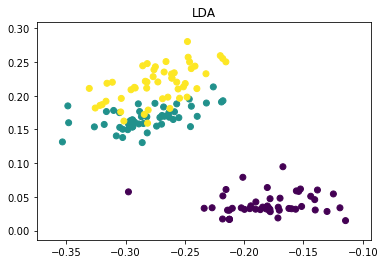

In [10]:
from __future__ import print_function
import scipy
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np



def shuffle_data(X, y, seed=None):
    if seed:
        np.random.seed(seed)

    idx = np.arange(X.shape[0])
    np.random.shuffle(idx)

    return X[idx], y[idx]



# 正规化数据集 X
def normalize(X, axis=-1, p=2):
    lp_norm = np.atleast_1d(np.linalg.norm(X, p, axis))
    lp_norm[lp_norm == 0] = 1
    return X / np.expand_dims(lp_norm, axis)


# 标准化数据集 X
def standardize(X):
    X_std = np.zeros(X.shape)
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    
    # 做除法运算时请永远记住分母不能等于0的情形
    # X_std = (X - X.mean(axis=0)) / X.std(axis=0) 
    for col in range(np.shape(X)[1]):
        if std[col]:
            X_std[:, col] = (X_std[:, col] - mean[col]) / std[col]
    
    return X_std


# 划分数据集为训练集和测试集
def train_test_split(X, y, test_size=0.2, shuffle=True, seed=None):
    if shuffle:
        X, y = shuffle_data(X, y, seed)
        
    n_train_samples = int(X.shape[0] * (1-test_size))
    x_train, x_test = X[:n_train_samples], X[n_train_samples:]
    y_train, y_test = y[:n_train_samples], y[n_train_samples:]

    return x_train, x_test, y_train, y_test


def accuracy(y, y_pred):
    y = y.reshape(y.shape[0], -1)
    y_pred = y_pred.reshape(y_pred.shape[0], -1)
    return np.sum(y == y_pred)/len(y)


# 计算矩阵X的协方差矩阵
def calculate_covariance_matrix(X, Y=np.empty((0,0))):
    if not Y.any():
        Y = X
    n_samples = np.shape(X)[0]
    covariance_matrix = (1 / (n_samples-1)) * (X - X.mean(axis=0)).T.dot(Y - Y.mean(axis=0))

    return np.array(covariance_matrix, dtype=float)




class MultiClassLDA():
    """
    线性判别分析分类算法(Linear Discriminant Analysis classifier). 既可以用来分类也可以用来降维.
    此处实现二类情形(二类情形分类).

    Parameters:
    -----------
    solver: str
        若 solver = 'svd',  则使用SVD(奇异值分解)方法求解矩阵伪逆; 否则直接求解矩阵的逆.
    eigen_values: 
        矩阵SW^(-1).dot(SB)的特征值.
    eigen_vectors:
        矩阵SW^(-1).dot(SB)的特征值所对应的特征向量.
    k: int
        投影空间(低维空间)的维度.
    """
    def __init__(self, solver="svd"):
        self.solver = solver
        self.eigen_values = None
        self.eigen_vectors = None
        self.k = 2

    def calculate_scatter_matrices(self, X, y):
        n_features = np.shape(X)[1]
        labels = np.unique(y)

        # 计算类内散布矩阵:SW = sum{sum{(Xi^(k) - Xi_mean).dot((Xi^(k) - Xi_mean).T)}for k}for i
        # 和类间散布矩阵: SB = sum{ ni * (Xi_mean - X_mean).dot((Xi_mean - X_mean).T) }
        SW = np.empty((n_features, n_features))
        SB = np.empty((n_features, n_features))
        X_mean = X.mean(axis=0)
        for label in labels:
            Xi = X[y == label]
            SW = SW + (Xi.shape[0] - 1) * calculate_covariance_matrix(Xi)
            
            Xi_mean = Xi.mean(axis=0)
            SB = SB + Xi.shape[0] * (Xi_mean - X_mean).dot((Xi_mean - X_mean).T)
        return SW, SB

    def transform(self, X, y):
        SW, SB = self.calculate_scatter_matrices(X, y)

        # 使用SVD(奇异值分解)求解SW伪逆.
        if self.solver == "svd":
            # Calculate SW^-1 * SB by SVD (pseudoinverse of diagonal matrix S)
            U, S, V = np.linalg.svd(SW)
            S = np.diag(S)
            SW_inverse = V.dot(np.linalg.pinv(S)).dot(U.T)
            A = SW_inverse.dot(SB)
            
        # 直接求解矩阵SW的逆矩阵.
        else:
            A = np.linalg.inv(SW).dot(SB)

        # 求解矩阵A的特征值和对应的特征向量
        self.eigen_values, self.eigen_vectors = np.linalg.eigh(A)

        # 将特征值按照其绝对值从大到小进行排序(因为SW, SB是对称阵, 故A也是对称阵, 
        # 因此A的特征值是非负的), 取其前k个特征值以及对应的k个特征向量
        idx = self.eigen_values.argsort()[::-1]
        topk_eigen_values = self.eigen_values[idx][:self.k]
        topk_eigen_vectors = self.eigen_vectors[:, idx][:, :self.k]

        # 将样本投影到低维空间
        X_transformed = X.dot(topk_eigen_vectors)

        return X_transformed

    # Plot the dataset X and the corresponding labels y in 2D using the LDA
    # transformation.
    def visualization(self, X, y, title=None):
        X_transformed = self.transform(X, y)
        x1 = X_transformed[:, 0]
        x2 = X_transformed[:, 1]
        plt.scatter(x1, x2, c=y)
        if title: 
            plt.title(title)
        plt.show()


def main():
    # Load the dataset
    data = datasets.load_iris()
    X = normalize(data.data)
    y = data.target

    # Project the data onto the 2 primary components
    multi_class_lda = MultiClassLDA()
    multi_class_lda.visualization(X, y, title="LDA")

if __name__ == "__main__":
    main()


参考文献：

刘建平Pinard：http://www.cnblogs.com/pinard/p/6244265.html

JerryLead：http://www.cnblogs.com/jerrylead/archive/2011/04/21/2024389.html
